## Times Analysis

In this notebook, I will elaborate and confront the times data obtained from testing our custom algorithm for the broadcast with the original algorithm used by OpenMPI. This data are obtained to confront the strong scalability of the two algorithms for a number of processes that goes from 4 to 64. Therefore, I have fixed the size of the problem: an array of 5 integers to pass. I will consider the times also for the processes on the same node or split between two nodes. 

In [1]:
#We will use Numpy to handle the arrays of data, pandas to extract the data from the files and matplotlib to plot the results.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### SAME NODE TIMES

In [2]:
#First I've already set the name. If you exec this notebook in the repo this should work.
customs_names = [ #File names of the times for the custom algorithm
    "samenode_times/bcustom_times_4.txt",
    "samenode_times/bcustom_times_8.txt",
    "samenode_times/bcustom_times_16.txt",
    "samenode_times/bcustom_times_32.txt",
    "samenode_times/bcustom_times_64.txt"
]

native_names = [ #File names of the times for the original algorithm
    "samenode_times/bnative_times_4.txt",
    "samenode_times/bnative_times_8.txt",
    "samenode_times/bnative_times_16.txt",
    "samenode_times/bnative_times_32.txt",
    "samenode_times/bnative_times_64.txt"
]

I have for each file a total of 200 tests, so I want to find the mean computational time and the std for each one of the files. Let's start with the ones of the custom algorithm

In [3]:
custom_stats = np.zeros((len(customs_names),2),dtype=float) #array for the means and stds of each file

for i in range(len(custom_stats)):
    #Import the associated data and compute
    file = pd.read_table(customs_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    custom_stats[i,0]=np.mean(file)
    custom_stats[i,1]=np.std(file)

In [4]:
print(custom_stats)

[[0.00084046 0.00333167]
 [0.0038764  0.00635264]
 [0.00649282 0.00828161]
 [0.00907455 0.00901626]
 [0.0133773  0.00919878]]


Already from this print, one can observe that the mean value increase with a bigger number of processes as expected. Let's do the same for the original algorithm

In [5]:
native_stats = np.zeros((len(native_names),2),dtype=float)

for i in range(len(native_stats)):
    file = pd.read_table(native_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    native_stats[i,0]=np.mean(file)
    native_stats[i,1]=np.std(file)

In [6]:
print(native_stats)

[[0.000616   0.0022893 ]
 [0.00215564 0.0054228 ]
 [0.00208517 0.00470616]
 [0.00291378 0.00648669]
 [0.00146622 0.00410683]]


Looking to the mean, it is already observable that the mean value is lower, especially for a bigger number of cores, than the mean value for the custom algorithm. The std seems comparable

In [7]:
#Prepare the "x" for the plot a.k.a. the number of cores
cores = np.array([4,8,16,32,64],dtype=int)
print(cores)

[ 4  8 16 32 64]


<ErrorbarContainer object of 3 artists>

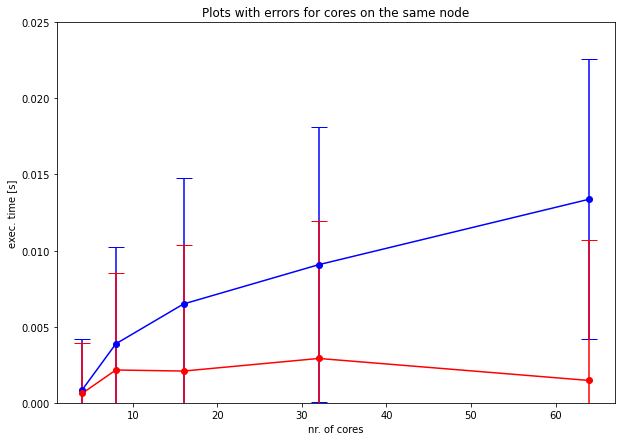

In [8]:
#And now let's plot
plt.figure(figsize=(10,7))
plt.title("Plots with errors for cores on the same node")
plt.xlabel("nr. of cores")
plt.ylabel("exec. time [s]")
plt.plot(cores,custom_stats[:,0],color='b')
plt.plot(cores,native_stats[:,0],color='r')
plt.ylim(0,0.025)
plt.errorbar(cores,custom_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(cores,native_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='red',capsize=8)

For a small number of cores, the two computational times are almost the same and also the std is comparable. Moving up, the custom algorithm perform worse than the original algorithm, even if, the difference is not enormous. With a bigger number of processes, we can observe that the original broadcast has almost a constant execution time.
Another important fact is the entity of the fluctuations. As one can observe, the variability of the execution time is quite strong in both of the algorithm and there is always an important superposition of the two intervals. In all the case except for the last one, there is also that the mean point of the other algorithm stays inside the interval associated to the other one.

### DIFFERENT NODES TIMES

Now, let's do the exact same thing when the cores are split between two different nodes. The process is almost the same so I will not put comments inside the code.

In [9]:
customs_names = [
    "diffnode_times/bcustom_times_4.txt",
    "diffnode_times/bcustom_times_8.txt",
    "diffnode_times/bcustom_times_16.txt",
    "diffnode_times/bcustom_times_32.txt",
    "diffnode_times/bcustom_times_64.txt"
]

native_names = [
    "diffnode_times/bnative_times_4.txt",
    "diffnode_times/bnative_times_8.txt",
    "diffnode_times/bnative_times_16.txt",
    "diffnode_times/bnative_times_32.txt",
    "diffnode_times/bnative_times_64.txt"
]

In [10]:
custom_stats = np.zeros((len(customs_names),2),dtype=float)

for i in range(len(custom_stats)):
    file = pd.read_table(customs_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    custom_stats[i,0]=np.mean(file)
    custom_stats[i,1]=np.std(file)

In [11]:
print(custom_stats)

[[0.00772684 0.00611083]
 [0.01175151 0.008321  ]
 [0.0163661  0.00680017]
 [0.02252312 0.01257868]
 [0.01631687 0.01038022]]


As one can observe, the mean values are greater than before, even if, not so different.

In [12]:
native_stats = np.zeros((len(native_names),2),dtype=float)

for i in range(len(native_stats)):
    file = pd.read_table(native_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    native_stats[i,0]=np.mean(file)
    native_stats[i,1]=np.std(file)

In [13]:
print(native_stats)

[[0.0066918  0.00607828]
 [0.0090816  0.00750992]
 [0.01133511 0.00768043]
 [0.01970844 0.01455502]
 [0.00448719 0.0067398 ]]


A similar behaviour can be observed here

In [14]:
cores = np.array([4,8,16,32,64],dtype=int)
print(cores)

[ 4  8 16 32 64]


<ErrorbarContainer object of 3 artists>

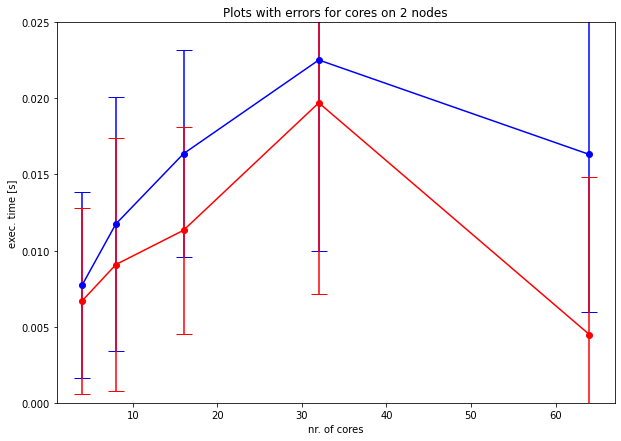

In [15]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for cores on 2 nodes")
plt.xlabel("nr. of cores")
plt.ylabel("exec. time [s]")
plt.plot(cores,custom_stats[:,0],color='b')
plt.plot(cores,native_stats[:,0],color='r')
plt.ylim(0,0.025)
plt.errorbar(cores,custom_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(cores,native_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='red',capsize=8)

Looking to this plot, the behaviours of both the algorithms are far different. The original algorithm now presents a growing trend in the computation time for a growing number of cores. The distances between the two are very narrow and the intervals present an almost complete superposition. The last point for both of the algorithms presents a strange behaviour. As we can see, the computation time drops to lower value especially for the original algorithm. We can try to formulate some possible explantions:

- The first explanation, probably too simple, is that we have produced an insanely particular set of tests that give us as image an unrealistic behaviour. In other words, considering a bigger number of tests this anomaly should disappear.
- A second explanation can be formulated looking especially to the original broadcast regime. Before trying to explain this event, I would like to bring to the attention the fact that I don't know how the different cores are assigned to the IDs and if there is some kind of priorities but I can imagine for a second that all the ID are assigned first on the cores in a node A and then to the cores in the node B and not in a casual order. If this situation occures, I will have at first a message passing between the cores on node A and then I will have the message passing between some "link" cores from A to B. If the mass of the core in each node is sufficiently high, the contribution given from the message passing from node A to B will become less and less relevant in comparison with the execution time part given by the "volume" cores of each node. Now, if is present some kind of priority in the ID assignation or, in some way, is not completly and authentically casual, this observation can be in some degree generalized explaining in such way the result.